# Spectrum Analyzer

Please follow the instructions on the pdf.
Run and compile the following 2 cells - DO NOT EDIT THEM!

In [1]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
from scipy import signal
from IPython.display import Audio

In [2]:
# Pre-filled buffering function from 'Librosa'
# Use this function to section a signal into buffers

def frame(y, frame_length=1024, hop_length=512):
    '''Slice a time series into overlapping frames.

    This implementation uses low-level stride manipulation to avoid
    redundant copies of the time series data.

    Parameters
    ----------
    y : np.ndarray [shape=(n,)]
        Time series to frame. Must be one-dimensional and contiguous
        in memory.

    frame_length : int > 0 [scalar]
        Length of the frame in samples

    hop_length : int > 0 [scalar]
        Number of samples to hop between frames

    Returns
    -------
    y_frames : np.ndarray [shape=(frame_length, N_FRAMES)]
        An array of frames sampled from `y`:
        `y_frames[i, j] == y[j * hop_length + i]`

    Raises
    ------
    ParameterError
        If `y` is not contiguous in memory, not an `np.ndarray`, or
        not one-dimensional.  See `np.ascontiguous()` for details.

        If `hop_length < 1`, frames cannot advance.

        If `len(y) < frame_length`.

    Examples
    --------
    Extract 2048-sample frames from `y` with a hop of 64 samples per frame

    >>> y, sr = librosa.load(librosa.util.example_audio_file())
    >>> librosa.util.frame(y, frame_length=2048, hop_length=64)
    array([[ -9.216e-06,   7.710e-06, ...,  -2.117e-06,  -4.362e-07],
           [  2.518e-06,  -6.294e-06, ...,  -1.775e-05,  -6.365e-06],
           ...,
           [ -7.429e-04,   5.173e-03, ...,   1.105e-05,  -5.074e-06],
           [  2.169e-03,   4.867e-03, ...,   3.666e-06,  -5.571e-06]], dtype=float32)

    '''

    if not isinstance(y, np.ndarray):
        raise ParameterError('Input must be of type numpy.ndarray, '
                             'given type(y)={}'.format(type(y)))

    if y.ndim != 1:
        raise ParameterError('Input must be one-dimensional, '
                             'given y.ndim={}'.format(y.ndim))

    if len(y) < frame_length:
        raise ParameterError('Buffer is too short (n={:d})'
                             ' for frame_length={:d}'.format(len(y), frame_length))

    if hop_length < 1:
        raise ParameterError('Invalid hop_length: {:d}'.format(hop_length))

    if not y.flags['C_CONTIGUOUS']:
        raise ParameterError('Input buffer must be contiguous.')

    # Compute the number of frames that will fit. The end may get truncated.
    n_frames = 1 + int((len(y) - frame_length) / hop_length)

    # Vertical stride is one sample
    # Horizontal stride is `hop_length` samples
    y_frames = np.lib.stride_tricks.as_strided(y, shape=(frame_length, n_frames),
                          strides=(y.itemsize, hop_length * y.itemsize))
    return y_frames

# PART 1

-  Fill the skeleton functions below with the correct code
-  Generate a matrix that contains snapshots in time of a signal's the frequency content.


In [3]:
def spectrum(sig, fs, buf_length, win_type, pad_length=0):
    
        
# Window & frame

    if (win_type == "rectangular"):
        buf_frame = buffer1(sig, buf_length)

    else: 
        buf_frame = frame(sig, buf_length, hop_length = 512)
        
        
        if (win_type == "hamming"):
            window = np.hamming (len(buf_frame))
        
        
        if (win_type == "hann"):
            window = np.hanning (len(buf_frame))
        
        
        if (win_type == "blackman"):
            window = np.blackman (len(buf_frame)) 
        
        
        
        #Extra Credit 1 (Zero Pad)
        ZeroPad = np.append(window, np.zeros(pad_length))
        
        
        
        for column in range(0,len(buf_frame[0])):
            buf_frame[:,column] = buf_frame[:,column] * window            
            
            
            #Extra Credit 1 (Zero Pad)
            ZeroPad = np.append(buf_frame[:,column], np.zeros(pad_length))

    
    
    y = np.array([])
    
    for column in range(0,len(buf_frame[0])):
        
        #Window
        Windowed_Frame = buf_frame [:,column]
        
        #fft
        fft_frame = np.fft.rfft (Windowed_Frame)
        
        #normalize
        normalized_fft = np.abs(fft_frame)
        
        #dB
        db_Scale_fft = 20 * np.log10(normalized_fft)
        
        
        
        if(len(y) == 0):
            y = np.array ([db_Scale_fft]).T
        
        else:
            y = np.column_stack ([y, db_Scale_fft])

    
    
    f_vector = np.arange(0, fs/2, fs/2/len(y))
    
    t_vector = np.arange(0, len(sig)/fs, len(sig)/fs/len(y[0]))
    
    
    
    return y, f_vector, t_vector



In [4]:
#buffer function

def buffer1(sig,buf_length):
    numb_c = int(np.ceil(len(sig)/buf_length))
    
    place_h = np.zeros([buf_length,numb_c])
    
    for i in range(0,numb_c):
        st = i * buf_length
        en = buf_length + st


        if en<len(sig):
            place_h[:,i] += sig[st:en]
        else:
            en = len(sig)
            place_h[0:len(sig[st:en]),i] += sig[st:en]
    
    return place_h
    

# PART 1.2

-  Load test signals (mono)

In [5]:
sig1 = sf.read('AudioA2.wav')[0]
display(Audio(sig1, rate =44100))

#### Load a second test signal of your choice

##### (Don't forget to include it with you assignment)

# PART 2

-  Use the matrices generated above to plot and display the two spectrograms using np.pcolormesh()
-  Remember to specify inside pcolor both axis so that the numbers represent time (x-axis) and frequency (y-axis).
-  Make sure the spectrogram only displays unaliased audio.

Text(0, 0.5, 'Frequency [Hz]')

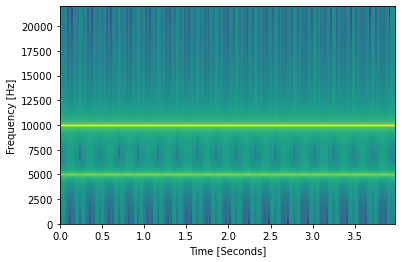

In [6]:
m1, f1, t1 = spectrum (sig1, 44100, 1024, "rectangular",)
plt.pcolormesh(t1,f1,m1)
plt.xlabel('Time [Seconds]')
plt.ylabel('Frequency [Hz]')

Text(0, 0.5, 'Frequency [Hz]')

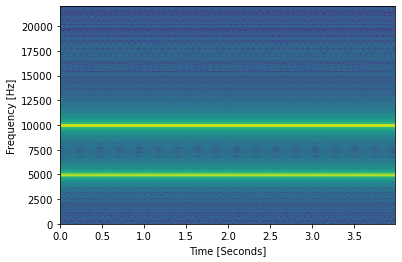

In [7]:
m1, f1, t1 = spectrum (sig1, 44100, 1024, "blackman",)
plt.pcolormesh(t1,f1,m1)
plt.xlabel('Time [Seconds]')
plt.ylabel('Frequency [Hz]')

Text(0, 0.5, 'Frequency [Hz]')

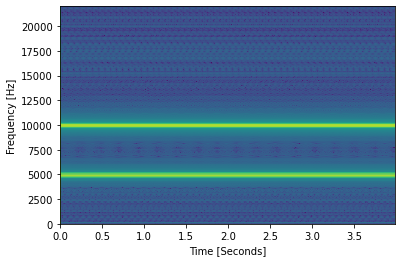

In [8]:
m1, f1, t1 = spectrum (sig1, 44100, 1024, "hamming", 1000)
plt.pcolormesh(t1,f1,m1)
plt.xlabel('Time [Seconds]')
plt.ylabel('Frequency [Hz]')

Text(0, 0.5, 'Frequency [Hz]')

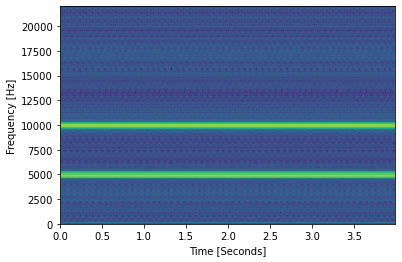

In [9]:
m1, f1, t1 = spectrum (sig1, 44100, 1024, "hann")
plt.pcolormesh(t1,f1,m1)
plt.xlabel('Time [Seconds]')
plt.ylabel('Frequency [Hz]')

In [10]:
# LOAD ANOTHER SIGNAL

sig2 = sf.read('Sinesweeps2.wav')[0]
display(Audio(sig2, rate =44100))

Text(0, 0.5, 'Frequency [Hz]')

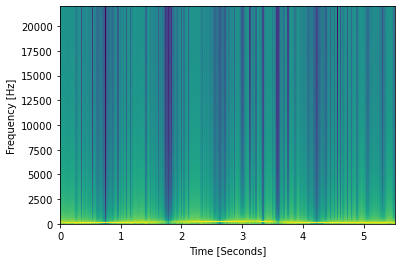

In [11]:
m2, f2, t2 = spectrum (sig2, 44100, 1024, "rectangular",)
plt.pcolormesh(t2,f2,m2)
plt.xlabel('Time [Seconds]')
plt.ylabel('Frequency [Hz]')

Text(0, 0.5, 'Frequency [Hz]')

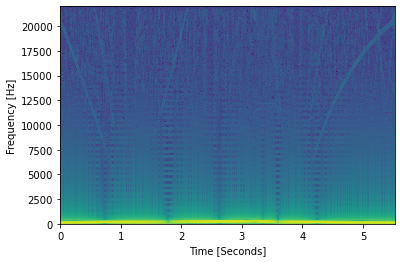

In [12]:
m2, f2, t2 = spectrum (sig2, 44100, 1024, "blackman",)
plt.pcolormesh(t2,f2,m2)
plt.xlabel('Time [Seconds]')
plt.ylabel('Frequency [Hz]')

Text(0, 0.5, 'Frequency [Hz]')

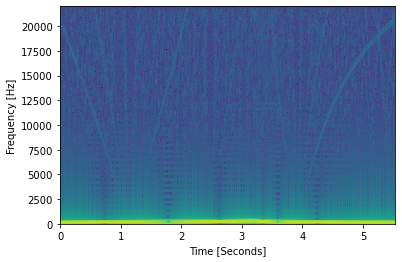

In [13]:
m2, f2, t2 = spectrum (sig2, 44100, 1024, "hamming",)
plt.pcolormesh(t2,f2,m2)
plt.xlabel('Time [Seconds]')
plt.ylabel('Frequency [Hz]')

Text(0, 0.5, 'Frequency [Hz]')

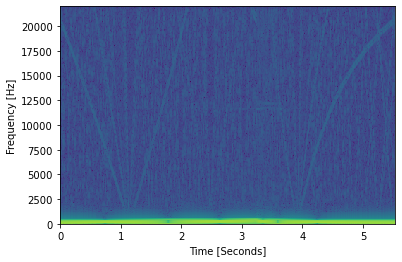

In [14]:
m2, f2, t2 = spectrum (sig2, 44100, 1024, "hann",)
plt.pcolormesh(t2,f2,m2)
plt.xlabel('Time [Seconds]')
plt.ylabel('Frequency [Hz]')